MATPLOT LIB INSTRUCTIONS: https://matplotlib.org/stable/gallery/showcase/stock_prices.html


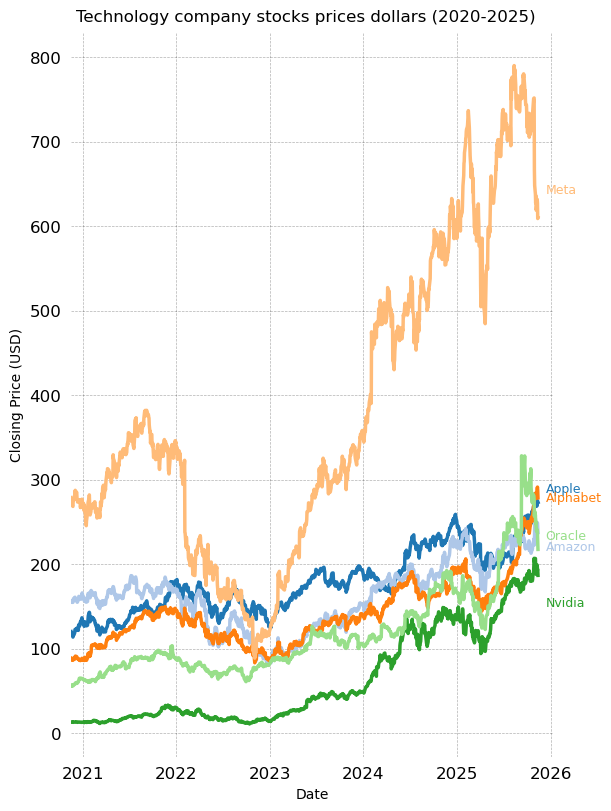

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

from matplotlib.cbook import get_sample_data
import matplotlib.transforms as mtransforms
import matplotlib.dates as mdates

def load_file(filename):
    raw = np.genfromtxt(
        filename, delimiter=',', names=True, dtype=None, encoding=None)

    possible_cols = ['CloseLast', 'Close_Last', 'Close', 'Adj_Close']
    for col in possible_cols:
        if col in raw.dtype.names:
            close_col = col
            break

    dates = np.array([
        np.datetime64(dt.datetime.strptime(d, '%m/%d/%Y'))
        for d in raw['Date']
    ])

    closes = np.array([
        float(s.replace('$', '').replace(',', ''))
        for s in raw[close_col]
    ])

    dates = dates[::-1]
    closes = closes[::-1]

    return dates, closes

dates, aapl = load_file('apple5yrdata.csv')
_, amzn = load_file('Amazon5yrdata.csv')
_, googl = load_file('Aplhabet5yrdata.csv')
_, meta = load_file('Meta5yrdata.csv')
_, nvda = load_file('Nvidia5yrdata.csv')
_, orcl = load_file('Oracle5yrdata.csv')

stock_data = np.zeros(len(dates), dtype=[
    ('Date', 'datetime64[D]'),
    ('AAPL', 'f8'),
    ('AMZN', 'f8'),
    ('GOOGL', 'f8'),
    ('META', 'f8'),
    ('NVDA', 'f8'),
    ('ORCL', 'f8'),
])

stock_data['Date'] = dates
stock_data['AAPL'] = aapl
stock_data['AMZN'] = amzn
stock_data['GOOGL'] = googl
stock_data['META'] = meta
stock_data['NVDA'] = nvda
stock_data['ORCL'] = orcl

fig, ax = plt.subplots(1, 1, figsize=(6, 8), layout='constrained')

ax.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

stocks_name = ['Apple', 'Amazon', 'Alphabet', 'Meta', 'Nvidia', 'Oracle']
stocks_ticker = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NVDA', 'ORCL']

# vertical offsets (in points) so labels don't overlap
y_offsets = {
    'AAPL': 10,
    'AMZN': -10,
    'GOOGL': 0,
    'META': 20,
    'NVDA': -20,
    'ORCL': 10,
}

for nn, column in enumerate(stocks_ticker):
    good = np.nonzero(np.isfinite(stock_data[column]))
    line, = ax.plot(stock_data['Date'][good], stock_data[column][good], lw=2.5)

    y_pos = stock_data[column][good][-1]
    # put labels a bit to the right of the last date
    x_pos = stock_data['Date'][good][-1] + np.timedelta64(30, 'D')

    offset = y_offsets[column] / 72.0
    trans = mtransforms.ScaledTranslation(0, offset, fig.dpi_scale_trans)
    trans = ax.transData + trans

    ax.text(x_pos, y_pos, stocks_name[nn],
            color=line.get_color(), transform=trans,
            fontsize=9, va='center')

# extend x-axis so labels fit
ax.set_xlim(stock_data['Date'].min(),
            stock_data['Date'].max() + np.timedelta64(60, 'D'))

fig.suptitle("Technology company stocks prices dollars (2020-2025)",
             ha="center")

ax.spines[:].set_visible(False)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.grid(True, 'both', 'both', ls='--', lw=.5, c='k', alpha=.3)

ax.tick_params(axis='both', which='both', labelsize='large',
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

ax.set_xlabel("Date")
ax.set_ylabel("Closing Price (USD)")

plt.show()

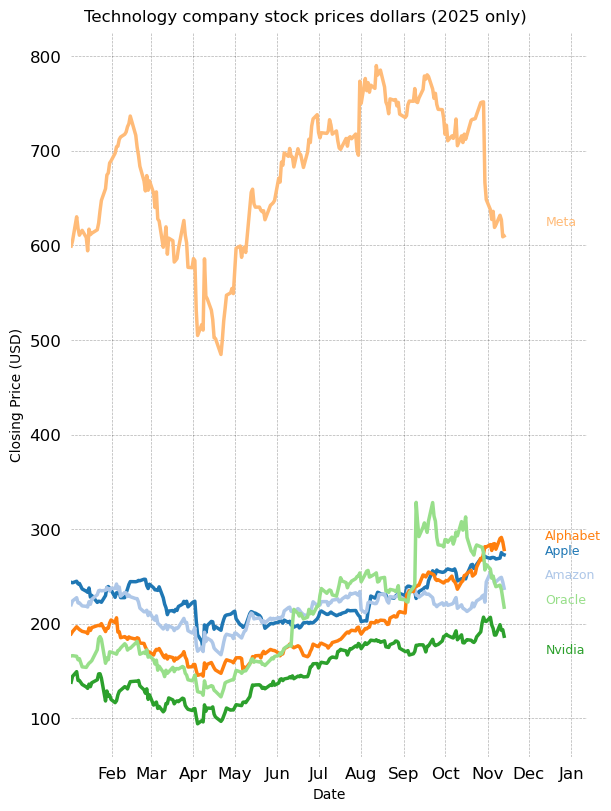

In [9]:
only_2025_list = []
for d in stock_data['Date']:
    if str(d)[:4] == '2025':
        only_2025_list.append(True)
    else:
        only_2025_list.append(False)

only_2025 = np.array(only_2025_list)
stock_data_2025 = stock_data[only_2025]

fig2, ax2 = plt.subplots(1, 1, figsize=(6, 8), layout='constrained')

ax2.set_prop_cycle(color=[
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])

stocks_name = ['Apple', 'Amazon', 'Alphabet', 'Meta', 'Nvidia', 'Oracle']
stocks_ticker = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NVDA', 'ORCL']

y_offsets = {
    'AAPL': 3,
    'AMZN': 10,
    'GOOGL':10,
    'META':10,
    'NVDA': -10,
    'ORCL': 5,
}

for nn, column in enumerate(stocks_ticker):
    good = np.nonzero(np.isfinite(stock_data_2025[column]))
    line, = ax2.plot(stock_data_2025['Date'][good],
                     stock_data_2025[column][good], lw=2.5)

    y_pos = stock_data_2025[column][good][-1]
    x_pos = stock_data_2025['Date'][good][-1] + np.timedelta64(30, 'D')

    offset = y_offsets[column] / 72.0
    trans = mtransforms.ScaledTranslation(0, offset, fig2.dpi_scale_trans)
    trans = ax2.transData + trans

    ax2.text(x_pos, y_pos, stocks_name[nn],
             color=line.get_color(), transform=trans,
             fontsize=9, va='center')

ax2.set_xlim(stock_data_2025['Date'].min(),
             stock_data_2025['Date'].max() + np.timedelta64(60, 'D'))

fig2.suptitle("Technology company stock prices dollars (2025 only)",
               ha="center")

ax2.spines[:].set_visible(False)

ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()

ax2.grid(True, 'both', 'both', ls='--', lw=.5, c='k', alpha=.3)

ax2.tick_params(axis='both', which='both', labelsize='large',
                bottom=False, top=False, labelbottom=True,
                left=False, right=False, labelleft=True)

ax2.set_xlabel("Date")
ax2.set_ylabel("Closing Price (USD)")

plt.show()